### Enzime clasification

##### Este notebook asume las conclusiones de otras versiones, donde se prueba que calcular EC1 y EC2 por separado logra peores resultados que calcularlos de manera secuencial

In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s3e18/sample_submission.csv
/kaggle/input/playground-series-s3e18/train.csv
/kaggle/input/playground-series-s3e18/test.csv


In [2]:
# Importar datos

data_set = pd.read_csv("/kaggle/input/playground-series-s3e18/train.csv")
data_set

,id,BertzCT,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3v,Chi4n,EState_VSA1,...,SlogP_VSA3,VSA_EState9,fr_COO,fr_COO2,EC1,EC2,EC3,EC4,EC5,EC6
0,0,323.390782,9.879918,5.875576,5.875576,4.304757,4.304757,2.754513,1.749203,0.000000,...,4.794537,35.527357,0,0,1,1,0,0,0,0
1,1,273.723798,7.259037,4.441467,5.834958,3.285046,4.485235,2.201375,1.289775,45.135471,...,13.825658,44.707310,0,0,0,1,1,0,0,0
2,2,521.643822,10.911303,8.527859,11.050864,6.665291,9.519706,5.824822,1.770579,15.645394,...,17.964475,45.660120,0,0,1,1,0,0,1,0
3,3,567.431166,12.453343,7.089119,12.833709,6.478023,10.978151,7.914542,3.067181,95.639554,...,31.961948,87.509997,0,0,1,1,0,0,0,0
4,4,112.770735,4.414719,2.866236,2.866236,1.875634,1.875634,1.036450,0.727664,17.980451,...,9.589074,33.333333,2,2,1,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,14833,632.207041,10.911303,6.579933,9.179964,4.653583,6.030052,3.670528,1.770579,32.971529,...,18.947452,61.376610,0,0,1,1,0,0,0,0
14834,14834,62.568425,2.642734,1.446898,1.446898,0.879497,0.879497,0.174620,0.000000,0.000000,...,0.000000,10.000000,0,0,0,1,0,1,0,0
14835,14835,981.327476,10.363081,6.146219,6.146219,4.700576,4.700576,3.064846,2.133897,17.248535,...,0.000000,66.666667,0,0,1,1,0,0,0,0
14836,14836,299.171248,9.949161,6.589761,7.848913,5.276568,5.476436,3.978973,2.299833,45.623794,...,9.088795,45.583333,0,0,0,1,1,0,0,0


In [3]:
# Revisar valores nan o null

data_set.isna().sum()

id                   0
BertzCT              0
Chi1                 0
Chi1n                0
Chi1v                0
Chi2n                0
Chi2v                0
Chi3v                0
Chi4n                0
EState_VSA1          0
EState_VSA2          0
ExactMolWt           0
FpDensityMorgan1     0
FpDensityMorgan2     0
FpDensityMorgan3     0
HallKierAlpha        0
HeavyAtomMolWt       0
Kappa3               0
MaxAbsEStateIndex    0
MinEStateIndex       0
NumHeteroatoms       0
PEOE_VSA10           0
PEOE_VSA14           0
PEOE_VSA6            0
PEOE_VSA7            0
PEOE_VSA8            0
SMR_VSA10            0
SMR_VSA5             0
SlogP_VSA3           0
VSA_EState9          0
fr_COO               0
fr_COO2              0
EC1                  0
EC2                  0
EC3                  0
EC4                  0
EC5                  0
EC6                  0
dtype: int64

In [4]:
# Borrar variables sin utilidad

del data_set["EC3"], data_set["EC4"],data_set["EC5"], data_set["EC6"], data_set["id"]

<Axes: >

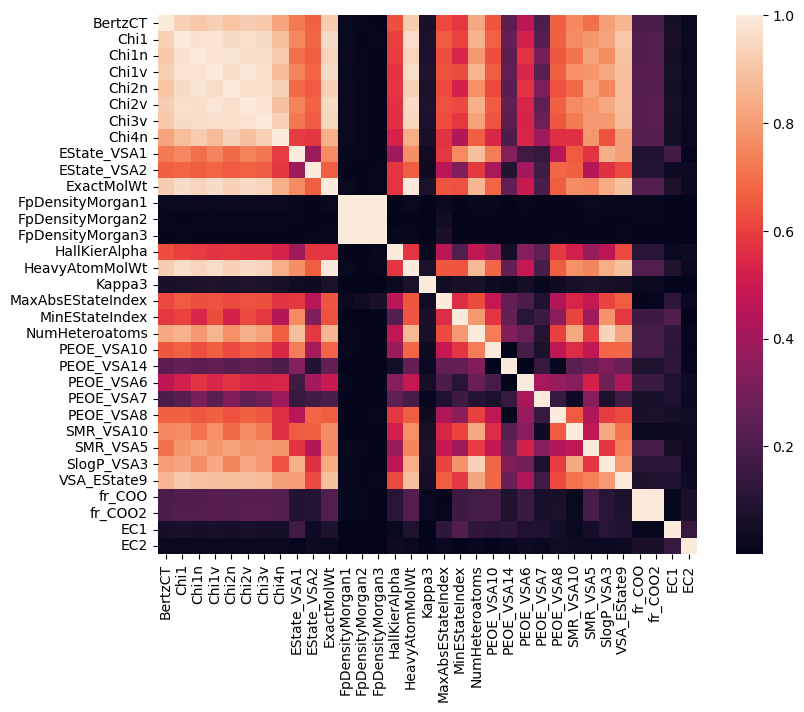

In [5]:
# Construir heatmap para observar correlaciones

import seaborn as sn
import matplotlib.pyplot as plt

corrmat = data_set.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

In [6]:
# Revisando correlaciones numericamente

corrmat.loc["fr_COO","fr_COO2"]

0.9956968274327537

In [7]:
# Revisando correlaciones numericamente

corrmat.loc["FpDensityMorgan1","FpDensityMorgan2"], corrmat.loc["FpDensityMorgan1","FpDensityMorgan3"], corrmat.loc["FpDensityMorgan2","FpDensityMorgan3"] 

(0.9992158423518994, 0.9974520788606056, 0.9988169363116716)

In [8]:
# Revisando correlaciones numericamente

corrmat.loc["EC1"], corrmat.loc["EC2"] 

(BertzCT              0.060120
 Chi1                 0.069660
 Chi1n                0.055030
 Chi1v                0.065679
 Chi2n                0.056264
 Chi2v                0.064649
 Chi3v                0.061797
 Chi4n                0.054333
 EState_VSA1          0.173752
 EState_VSA2          0.040751
 ExactMolWt           0.075954
 FpDensityMorgan1     0.000125
 FpDensityMorgan2     0.002198
 FpDensityMorgan3     0.005985
 HallKierAlpha        0.020765
 HeavyAtomMolWt       0.078682
 Kappa3               0.002552
 MaxAbsEStateIndex    0.122893
 MinEStateIndex       0.208827
 NumHeteroatoms       0.127448
 PEOE_VSA10           0.115469
 PEOE_VSA14           0.123488
 PEOE_VSA6            0.084942
 PEOE_VSA7            0.083718
 PEOE_VSA8            0.052619
 SMR_VSA10            0.025373
 SMR_VSA5             0.056336
 SlogP_VSA3           0.109439
 VSA_EState9          0.093636
 fr_COO               0.014353
 fr_COO2              0.014989
 EC1                  1.000000
 EC2    

In [9]:
# Revisando correlaciones numericamente

corrmat.loc["HeavyAtomMolWt"]

BertzCT              0.916533
Chi1                 0.961543
Chi1n                0.939796
Chi1v                0.961587
Chi2n                0.928774
Chi2v                0.956842
Chi3v                0.942007
Chi4n                0.841389
EState_VSA1          0.766878
EState_VSA2          0.663346
ExactMolWt           0.994905
FpDensityMorgan1     0.022002
FpDensityMorgan2     0.011231
FpDensityMorgan3     0.012100
HallKierAlpha        0.577941
HeavyAtomMolWt       1.000000
Kappa3               0.073555
MaxAbsEStateIndex    0.644824
MinEStateIndex       0.643817
NumHeteroatoms       0.871039
PEOE_VSA10           0.679597
PEOE_VSA14           0.259804
PEOE_VSA6            0.487616
PEOE_VSA7            0.187222
PEOE_VSA8            0.662362
SMR_VSA10            0.772290
SMR_VSA5             0.748263
SlogP_VSA3           0.841745
VSA_EState9          0.889792
fr_COO               0.215636
fr_COO2              0.217457
EC1                  0.078682
EC2                  0.029901
Name: Heav

In [10]:
# Eliminando variables redundantes

variables_to_drop = ['FpDensityMorgan2', 'FpDensityMorgan1', 'fr_COO2', 'HeavyAtomMolWt', 'Chi1', 'Chi1v', 'Chi2v', 'BertzCT', 'Chi4n', 'Chi3v', 'Chi1n', 'Chi2n']
for i in variables_to_drop:
    del data_set[i]

In [11]:

# Normalizando

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_data = scaler.fit(data_set)
data_set_scaled = pd.DataFrame(scaler_data.transform(data_set), index=data_set.index, columns=data_set.columns)


In [12]:
# Quitamos y del data_set

y = data_set_scaled[['EC1', 'EC2']].copy() #toma el valor de 1 cuando la variable es si y 0 cuando la variable es no
del data_set_scaled['EC1'], data_set_scaled["EC2"]
X = data_set_scaled
y

,EC1,EC2
0,1.0,1.0
1,0.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,0.0
...,...,...
14833,1.0,1.0
14834,0.0,1.0
14835,1.0,1.0
14836,0.0,1.0


In [13]:
# Separamos el train y test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [14]:
# Observando los valores de y

print(y_train.value_counts())

EC1  EC2
1.0  1.0    6045
0.0  1.0    3468
1.0  0.0    1877
0.0  0.0     480
dtype: int64


In [15]:
# Observando los valores de los sets

print(y_train.count(),X_train.count(),y_test.count(),X_train.count())

EC1    11870
EC2    11870
dtype: int64 EState_VSA1          11870
EState_VSA2          11870
ExactMolWt           11870
FpDensityMorgan3     11870
HallKierAlpha        11870
Kappa3               11870
MaxAbsEStateIndex    11870
MinEStateIndex       11870
NumHeteroatoms       11870
PEOE_VSA10           11870
PEOE_VSA14           11870
PEOE_VSA6            11870
PEOE_VSA7            11870
PEOE_VSA8            11870
SMR_VSA10            11870
SMR_VSA5             11870
SlogP_VSA3           11870
VSA_EState9          11870
fr_COO               11870
dtype: int64 EC1    2968
EC2    2968
dtype: int64 EState_VSA1          11870
EState_VSA2          11870
ExactMolWt           11870
FpDensityMorgan3     11870
HallKierAlpha        11870
Kappa3               11870
MaxAbsEStateIndex    11870
MinEStateIndex       11870
NumHeteroatoms       11870
PEOE_VSA10           11870
PEOE_VSA14           11870
PEOE_VSA6            11870
PEOE_VSA7            11870
PEOE_VSA8            11870
SMR_VSA10           

In [16]:
X_train.head(20)

,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO
487,0.016412,0.057532,0.078265,0.997909,0.722807,0.065237,0.660166,0.447844,0.095238,0.000000,0.012373,0.000000,0.000000,0.178948,0.073930,0.000000,0.000000,0.100707,0.000
10974,0.043017,0.066111,0.075567,0.997909,0.904094,0.067562,0.624424,0.103926,0.214286,0.000000,0.032430,0.000000,0.032736,0.000000,0.193770,0.028104,0.155663,0.067840,0.000
2600,0.123387,0.000000,0.119425,0.998019,0.723977,0.066615,0.627068,0.132185,0.309524,0.247071,0.016215,0.000000,0.000000,0.000000,0.096885,0.049804,0.119800,0.157321,0.000
12665,0.066049,0.064249,0.074665,0.998407,0.752047,0.065161,0.657498,0.398646,0.166667,0.000000,0.000000,0.000000,0.028728,0.181180,0.145556,0.049930,0.085293,0.119089,0.000
7926,0.016783,0.122118,0.032651,0.998656,0.890058,0.066795,0.615372,0.452339,0.071429,0.000000,0.000000,0.000000,0.000000,0.055441,0.000000,0.000000,0.000000,0.065654,0.000
3569,0.124099,0.064249,0.133302,0.998859,0.692398,0.066575,0.732790,0.119605,0.261905,0.064366,0.016215,0.000000,0.000000,0.063985,0.478020,0.049804,0.158998,0.146875,0.000
11824,0.000000,0.057532,0.058154,0.998207,0.894737,0.065583,0.526934,0.528989,0.047619,0.058871,0.000000,0.048476,0.057365,0.000000,0.000000,0.000000,0.000000,0.069501,0.000
8253,0.000000,0.234982,0.115826,0.998656,0.732164,0.065161,0.663631,0.464317,0.095238,0.000000,0.000000,0.000000,0.000000,0.120906,0.135855,0.025293,0.000000,0.127639,0.000
14593,0.232482,0.416338,0.396246,0.998581,0.618713,0.072918,0.816791,0.060242,0.666667,0.371274,0.048645,0.359288,0.000000,0.369702,0.856321,0.299814,0.439296,0.315531,0.000
14556,0.049437,0.000000,0.066632,0.998573,0.775439,0.066751,0.639393,0.418739,0.119048,0.061864,0.024747,0.000000,0.060717,0.000000,0.147861,0.038324,0.083090,0.110539,0.125


<Axes: >

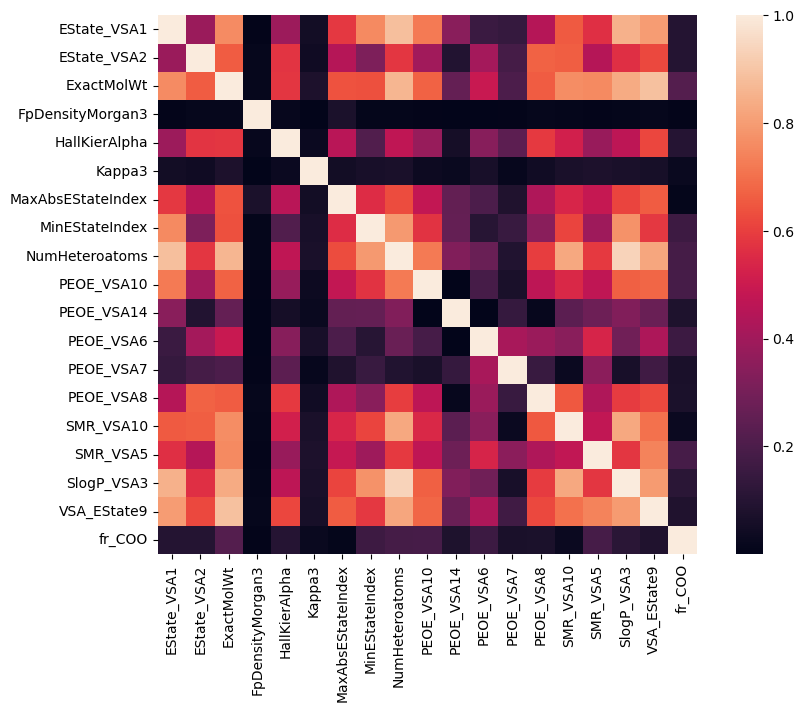

In [17]:
# Heatmap de correlacion

corrmat = X_train.corr().abs()
f, ax = plt.subplots(figsize=(10, 7))
sn.heatmap(corrmat, square=True)

In [18]:
# Oversampling para subsanar diferencias de clases

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority') 
X_train_n, y_train_n = sm.fit_resample(X_train, y_train["EC1"])
unique, counts = np.unique(y_train_n, return_counts=True)
dict(zip(unique, counts))

{0.0: 7922, 1.0: 7922}

In [19]:
X_train_n.info(), y_train_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15844 entries, 0 to 15843
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EState_VSA1        15844 non-null  float64
 1   EState_VSA2        15844 non-null  float64
 2   ExactMolWt         15844 non-null  float64
 3   FpDensityMorgan3   15844 non-null  float64
 4   HallKierAlpha      15844 non-null  float64
 5   Kappa3             15844 non-null  float64
 6   MaxAbsEStateIndex  15844 non-null  float64
 7   MinEStateIndex     15844 non-null  float64
 8   NumHeteroatoms     15844 non-null  float64
 9   PEOE_VSA10         15844 non-null  float64
 10  PEOE_VSA14         15844 non-null  float64
 11  PEOE_VSA6          15844 non-null  float64
 12  PEOE_VSA7          15844 non-null  float64
 13  PEOE_VSA8          15844 non-null  float64
 14  SMR_VSA10          15844 non-null  float64
 15  SMR_VSA5           15844 non-null  float64
 16  SlogP_VSA3         158

(None, None)

In [20]:
# Ajustar el formato

X_train_n = pd.DataFrame(X_train_n, columns = X_train_n.columns)
X_test = pd.DataFrame(X_test, columns = X_test.columns)

#### Parte 2: Prediciendo EC1
Aplicamos distintos modelos para predecir EC1: gradient boosting (xgb, lgbm), random forest, neural network.

##### 1. Random Forest

In [21]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

# Hiperparametros
n_estimators = [50, 100, 125]
max_features = ['sqrt']
max_depth = [5, 10, 15]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# Creamos la grilla de parametros
parameters_rfrandom = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_rm = RandomForestClassifier(random_state=0) # Definimos un random forest llamado rf_rm
rf_random = RandomizedSearchCV (estimator = rf_rm, param_distributions = parameters_rfrandom, cv = 4,
                                random_state = 0, n_jobs = -1)  # Definimos el RandomizedSearchCV


start_1=datetime.now()
rf_random.fit(X_train_n, y_train_n) # Entrenamos el modelo

print('Mejor Configuración de Parámetros')
print('n_estimators: ' +str(rf_random.best_params_['n_estimators']))
print('max_depth: ' +str(rf_random.best_params_['max_depth']))
print('min_samples_leaf: ' +str(rf_random.best_params_['min_samples_leaf']))
print('max_features: ' +str(rf_random.best_params_['max_features']))
print('min_samples_split: ' +str(rf_random.best_params_['min_samples_split']))
print('bootstrap: ' +str(rf_random.best_params_['bootstrap']))


stop_1=datetime.now()
execution_time = stop_1-start_1
print('tiempo de entrenamiento: {}'.format(execution_time))

Mejor Configuración de Parámetros
n_estimators: 100
max_depth: 15
min_samples_leaf: 2
max_features: sqrt
min_samples_split: 2
bootstrap: False
tiempo de entrenamiento: 0:00:50.909310


In [22]:
# Revisando rendimiento

from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score

y_pred_test_proba_rf_random = rf_random.predict_proba(X_test)[:,1]
auc_rf_random_test = roc_auc_score(y_test['EC1'], y_pred_test_proba_rf_random)


y_pred_train_proba_rf_random = rf_random.predict_proba(X_train_n)[:,1]
auc_rf_random_train = roc_auc_score(y_train_n, y_pred_train_proba_rf_random)

print("Random Forest. Random Search.")
print('AUC Test = %.2f' %(auc_rf_random_test*100))
print('AUC Train = %.2f' %(auc_rf_random_train*100))


Random Forest. Random Search.
AUC Test = 70.47
AUC Train = 99.15


##### 2. Red Neuronal

In [23]:
# Red neuronal

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Optimización hiperparámetros de la Red Neuronal
red = MLPClassifier()

# Hiper Parámetros a testear mediante Random Search
parametros = {
    'max_iter': [50, 100],
    'alpha': [0.1, 0.01, 0.001],
    'solver': ['adam', 'lbfgs'],
    'activation': ['relu', 'logistic'],
    'hidden_layer_sizes': randint(2, 7)
}

red_random = RandomizedSearchCV(red, parametros, n_iter=10, cv=10, random_state=0)
red_random.fit(X_train_n, y_train_n)

print(red_random.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimize

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 4, 'max_iter': 50, 'solver': 'lbfgs'}


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [24]:
# Calculando rendimiento

red_EC1 = red_random.best_estimator_

y_pred_test_proba_red_random = red_EC1.predict_proba(X_test)[:,1]
auc_red_random_test = roc_auc_score(y_test['EC1'], y_pred_test_proba_red_random)

y_pred_train_proba_red_random = red_EC1.predict_proba(X_train_n)[:,1]
auc_red_random_train = roc_auc_score(y_train_n, y_pred_train_proba_red_random)


print("Red Neuronal. Random Search:")
print('AUC Test = %.2f' %(auc_red_random_test*100))
print('AUC Train = %.2f' %(auc_red_random_train*100))


Red Neuronal. Random Search:
AUC Test = 70.89
AUC Train = 69.91


##### 3. Gradient Boosting (xgb)

In [25]:
# Conversion del conjunto de datos para xgb

import xgboost as xgb 

original_data  = xgb.DMatrix(X, label=y["EC1"])
train_data = xgb.DMatrix(X_train_n, label=y_train_n)
test_data = xgb.DMatrix(X_test, label=y_test["EC1"])


In [26]:
# Gradient Boosting

from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV

# creo el clasificador
gbm_random = xgb.XGBClassifier(objective='binary:logistic',
                               eval_metric='auc',
                               n_estimators=100,
                               verbosity=0,
                               random_state=0)
# Declaro los parametros a revisar
grid_parametros = {
    'max_depth': [1, 3, 6, 12],
    'min_child_weight': [1, 3, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.05, 0.1, 0.5],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500]
}

# Optimizo hiperparametros mediante random search
xgb_random = RandomizedSearchCV(gbm_random, grid_parametros, scoring='roc_auc', cv=5, n_jobs=-1)
start_1 = datetime.now()
xgb_random.fit(X_train_n, y_train_n)
stop_1 = datetime.now()


In [27]:
#Execution time: Cuanto se demoró en entrenar el modelo.

execution_time_xgb = stop_1-start_1

#muestro los mejores parametros
print(xgb_random.best_params_, execution_time_xgb)

{'subsample': 0.8, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8} 0:02:20.695554


In [28]:
from sklearn.metrics import roc_auc_score

# Escogemos ahora el mejor número de rondas en base a los hiperparámetros ya elegidos:
grid_parametros = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': xgb_random.best_params_['n_estimators'],
    'early_stopping_rounds': 100,
    'verbose': -10,
    'seed': 0,
    'max_depth': xgb_random.best_params_['max_depth'],
    'min_child_weight': xgb_random.best_params_['min_child_weight'],
    'subsample': xgb_random.best_params_['subsample'],
    'colsample_bytree': xgb_random.best_params_['colsample_bytree'],
    'learning_rate': xgb_random.best_params_['learning_rate'],
    'gamma': xgb_random.best_params_['gamma']}

# Corro el mejor modelo para conocer rounds optimo
xgb_random_best = xgb.train(grid_parametros, train_data, num_boost_round=xgb_random.best_params_['n_estimators'], 
                            evals=[(test_data, 'test')], early_stopping_rounds=100, verbose_eval=False)

print('Cantidad de rounds óptimo = %d' % xgb_random_best.best_iteration)


[01:12:09] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators", "verbose" } are not used.

Cantidad de rounds óptimo = 16


In [29]:
# Declaro los mejores parametros

params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': xgb_random_best.best_iteration,
    'verbose': -10,
    'seed': 0,
    'max_depth': xgb_random.best_params_['max_depth'],
    'min_child_weight': xgb_random.best_params_['min_child_weight'],
    'subsample': xgb_random.best_params_['subsample'],
    'colsample_bytree': xgb_random.best_params_['colsample_bytree'],
    'learning_rate': xgb_random.best_params_['learning_rate'],
    'gamma': xgb_random.best_params_['gamma']
}

xgb_random_best1 = xgb.train(params, train_data, num_boost_round=xgb_random_best.best_iteration)

# Generamos las predicciones.
y_pred_train = xgb_random_best1.predict(train_data)
auc_xgb_random_train = roc_auc_score(y_train_n, y_pred_train)

y_pred_test = xgb_random_best1.predict(test_data)
auc_xgb_random_test = roc_auc_score(y_test['EC1'], y_pred_test)

print("XGB. Random Search:")
print('AUC Train = %.2f' % (auc_xgb_random_train * 100))
print('AUC Test = %.2f' % (auc_xgb_random_test * 100))


[01:12:13] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "verbose" } are not used.

XGB. Random Search:
AUC Train = 95.05
AUC Test = 69.39


##### 4. Gradient Boosting (lgbm)

In [30]:
#Importamos lightgbm
import lightgbm as lgb 

# conversion del conjunto de datos

original_data_lgb  = lgb.Dataset(X, label=y["EC1"])
train_data_lgb = lgb.Dataset(X_train_n,label=y_train_n)
test_data_lgb = lgb.Dataset(X_test, label=y_test["EC1"] )

In [31]:
gbm_random = lgb.LGBMClassifier(boosting_type  = 'gbdt',
                        application = 'binary',
                        objective =  'binary',
                        metric = 'auc',
                        n_estimators = 100,
                        verbose= -10,
                        seed = 0)

grid_parametros = {
'max_depth': [1,3,6,12], #profundidad
'min_data_in_bin': [1,3,10], #Mínimo número de datos por bucket en histograma
'min_data_in_leaf': [5,20,40], #Mínima cantidad de datos en nodos terminales
'num_leaves':[150,200],
'learning_rate':[.05, 1, 1.5],
'max_bin':[200],
'n_estimators': [100,200,300,500]}  

lgbm_random = RandomizedSearchCV(gbm_random, grid_parametros, scoring = 'roc_auc', cv = 5, n_jobs=-1)
start_1=datetime.now()
lgbm_random.fit(X_train_n, y_train_n)
stop_1=datetime.now()

[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20


In [32]:
#Execution time: Cuanto se demoró en entrenar el modelo.

execution_time_lgb = stop_1-start_1

#muestro los mejores parametros
print(lgbm_random.best_params_, execution_time_lgb)

{'num_leaves': 200, 'n_estimators': 300, 'min_data_in_leaf': 20, 'min_data_in_bin': 3, 'max_depth': 12, 'max_bin': 200, 'learning_rate': 0.05} 0:00:58.213745


In [33]:
# Escogemos ahora el mejor rounds en base a los hiper parámetros ya elegidos:

grid_parametros = {'boosting_type': 'gbdt',
                        'application': 'binary',
                        'objective':  'binary',
                        'metric': 'auc',
                        'n_estimators': lgbm_random.best_params_['n_estimators'],
                        'early_stopping_rounds': 100,
                        'verbose': -10,
                        'seed': 0,
                        'max_depth':lgbm_random.best_params_['max_depth'],
                        'min_data_in_bin': lgbm_random.best_params_['min_data_in_bin'],
                        'min_data_in_leaf': lgbm_random.best_params_['min_data_in_leaf'],
                        'learning_rate': lgbm_random.best_params_['learning_rate'],
                        'max_bin': lgbm_random.best_params_['max_bin']}

lgbm_random_best = lgb.train(grid_parametros,
                        train_data_lgb,
                        valid_sets=test_data_lgb, 
                         verbose_eval=False)

print('Cantidad de rounds óptimo = %.1d' %lgbm_random_best.best_iteration)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Cantidad de rounds óptimo = 42


In [34]:
#  Ejecutamos el modelo con el rounds óptimo.

params = {'boosting_type': 'gbdt',
                        'application': 'binary',
                        'objective':  'binary',
                        'metric': 'auc',
                        'n_estimators': lgbm_random_best.best_iteration,
                        'verbose': -10,
                        'seed': 0,
                        'max_depth':lgbm_random.best_params_['max_depth'],
                        'min_data_in_bin': lgbm_random.best_params_['min_data_in_bin'],
                        'min_data_in_leaf': lgbm_random.best_params_['min_data_in_leaf'],
                        'learning_rate': lgbm_random.best_params_['learning_rate'],
                        'max_bin': lgbm_random.best_params_['max_bin']}
lgb_EC1 = lgb.train(params,
                        train_data_lgb)

# Generamos las predicciones.

y_pred = lgb_EC1.predict(X_train_n)
auc_lgbm_random_train = roc_auc_score(y_train_n, y_pred)

y_pred = lgb_EC1.predict(X_test)
auc_lgbm_random_test = roc_auc_score(y_test['EC1'], y_pred)


print ("LGBM. Random Search:")
print('AUC Train = %.2f' %(auc_lgbm_random_train*100))
print('AUC Test = %.2f' %(auc_lgbm_random_test*100))

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


LGBM. Random Search:
AUC Train = 83.85
AUC Test = 70.57


### Reentrenamos sobre toda la muestra el mejor modelo:

In [35]:
print("\nRandom Forest. Random Search:")
print('AUC Train = %.2f' %(auc_rf_random_train*100))
print('AUC Test = %.2f' %(auc_rf_random_test*100))

print("\nRed Neuronal. Random Search:")
print('AUC Train = %.2f' %(auc_red_random_train*100))
print('AUC Test = %.2f' %(auc_red_random_test*100))


print("\nXGB. Random Search:")
print('AUC Train = %.2f' % (auc_xgb_random_train * 100))
print('AUC Test = %.2f' % (auc_xgb_random_test * 100))

print ("\nLGBM. Random Search:")
print('AUC Train = %.2f' %(auc_lgbm_random_train*100))
print('AUC Test = %.2f' %(auc_lgbm_random_test*100))



Random Forest. Random Search:
AUC Train = 99.15
AUC Test = 70.47

Red Neuronal. Random Search:
AUC Train = 69.91
AUC Test = 70.89

XGB. Random Search:
AUC Train = 95.05
AUC Test = 69.39

LGBM. Random Search:
AUC Train = 83.85
AUC Test = 70.57


Dados los resultados, se decidirá utilizar LGBM. Esto debido a que obtiene el mejor resultado en el test set (junto a xgb), pero sin la necesidad de haber hecho overfitting en el train set

In [36]:
# Reentrenamos sobre todo el modelo

lgbm_EC1 = lgb.train(params,
                        original_data_lgb)


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


In [37]:
EC1 = lgbm_EC1.predict(X)
auc_lgbm_random = roc_auc_score(y['EC1'], EC1)


print ("LGBM. Random Search:")
print('AUC = %.2f' %(auc_lgbm_random*100))


LGBM. Random Search:
AUC = 75.68


In [38]:
# Los convertimos a df para añadirlos a x
EC1 = pd.DataFrame(EC1)
EC1 = EC1.rename(columns={0: 'EC1'})

In [39]:
# Concatenamos EC1 a X.

X_EC1 = pd.concat([X, EC1], axis=1)
X_EC1

,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,EC1
0,0.000000,0.119459,0.098851,0.998452,0.876023,0.069425,0.762784,0.527203,0.095238,0.000000,0.189739,0.000000,0.000000,0.000000,0.219762,0.000000,0.041545,0.105052,0.00,0.775163
1,0.124099,0.000000,0.115826,0.999058,0.893567,0.066351,0.699435,0.121441,0.238095,0.250000,0.016215,0.000000,0.000000,0.000000,0.096885,0.062318,0.119800,0.128598,0.00,0.312916
2,0.043017,0.066111,0.170425,0.998506,0.812865,0.073671,0.718993,0.102313,0.214286,0.000000,0.032430,0.000000,0.252378,0.000000,0.193770,0.148446,0.155663,0.131042,0.00,0.478808
3,0.262958,0.000000,0.236578,0.998312,0.752047,0.068530,0.714715,0.085251,0.452381,0.437500,0.044224,0.000000,0.000000,0.063985,0.193770,0.126047,0.276952,0.238382,0.00,0.459954
4,0.049437,0.128498,0.052343,0.998739,0.775439,0.066802,0.630555,0.377304,0.095238,0.061864,0.024747,0.018442,0.091661,0.000000,0.147861,0.038324,0.083090,0.099425,0.25,0.761214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14833,0.090654,0.066111,0.154744,0.998936,0.685380,0.067389,0.731046,0.101367,0.380952,0.176612,0.032430,0.000000,0.065472,0.068997,0.426142,0.066176,0.164181,0.171353,0.00,0.505073
14834,0.000000,0.000000,0.032651,0.998904,0.842105,0.064821,0.352326,0.533564,0.000000,0.000000,0.000000,0.000000,0.000000,0.060453,0.000000,0.013031,0.000000,0.039578,0.00,0.835409
14835,0.047424,0.000000,0.132398,0.999058,0.535673,0.065636,0.775349,0.477096,0.190476,0.353059,0.000000,0.000000,0.000000,0.236800,0.135855,0.000000,0.000000,0.184921,0.00,0.644722
14836,0.125441,0.000000,0.118477,0.997834,0.852632,0.069582,0.697960,0.174081,0.166667,0.000000,0.016215,0.051730,0.000000,0.000000,0.096885,0.221138,0.078755,0.130845,0.00,0.474983


### Ahora procedemos a predecir EC2 a partir de la prediccion de EC1.
Se probaran los mismos modelos.

In [40]:
# Hacemos split de train y test set
from sklearn.model_selection import train_test_split

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_EC1, y['EC2'], test_size=0.2, random_state=0)

In [41]:
X_train_2.info(), X_test_2.info(), y_train_2.info(), y_test_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11870 entries, 487 to 2732
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EState_VSA1        11870 non-null  float64
 1   EState_VSA2        11870 non-null  float64
 2   ExactMolWt         11870 non-null  float64
 3   FpDensityMorgan3   11870 non-null  float64
 4   HallKierAlpha      11870 non-null  float64
 5   Kappa3             11870 non-null  float64
 6   MaxAbsEStateIndex  11870 non-null  float64
 7   MinEStateIndex     11870 non-null  float64
 8   NumHeteroatoms     11870 non-null  float64
 9   PEOE_VSA10         11870 non-null  float64
 10  PEOE_VSA14         11870 non-null  float64
 11  PEOE_VSA6          11870 non-null  float64
 12  PEOE_VSA7          11870 non-null  float64
 13  PEOE_VSA8          11870 non-null  float64
 14  SMR_VSA10          11870 non-null  float64
 15  SMR_VSA5           11870 non-null  float64
 16  SlogP_VSA3         11

(None, None, None, None)

In [42]:
# Oversampling

sm = SMOTE(sampling_strategy='minority') 
X_train_n_2, y_train_n_2 = sm.fit_resample(X_train_2, y_train_2)
unique, counts = np.unique(y_train_n_2, return_counts=True)
dict(zip(unique, counts))

{0.0: 9513, 1.0: 9513}

##### 1. Gradient Boosting (xgb)

In [43]:
# Conversion del conjunto de datos

original_data_2  = xgb.DMatrix(X_EC1, label=y["EC2"])
train_data_2 = xgb.DMatrix(X_train_n_2, label=y_train_n_2)
test_data_2 = xgb.DMatrix(X_test_2, label=y_test_2)


In [44]:
# Creo el clasificador 2
gbm_random = xgb.XGBClassifier(objective='binary:logistic',
                               eval_metric='auc',
                               n_estimators=100,
                               verbosity=0,
                               random_state=0)
# Declaro los parametros a revisar
grid_parametros = {
    'max_depth': [1, 3, 6, 12],
    'min_child_weight': [1, 3, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'learning_rate': [0.05, 0.1, 0.5],
    'gamma': [0, 0.1, 0.2],
    'n_estimators': [100, 200, 300, 500]
}

# Optimizo hiperparametros mediante random search
xgb_random = RandomizedSearchCV(gbm_random, grid_parametros, scoring='roc_auc', cv=5, n_jobs=-1)
start_1 = datetime.now()
xgb_random.fit(X_train_n_2, y_train_n_2)
stop_1 = datetime.now()


[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_data_in_leaf is set=40, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=40
[LightGBM] [Warning] min_data_in_l

In [45]:
# Execution time: Cuanto se demoró en entrenar el modelo.

execution_time_xgb = stop_1-start_1

# Muestro los mejores parametros
print(xgb_random.best_params_, execution_time_xgb)

{'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 12, 'learning_rate': 0.5, 'gamma': 0, 'colsample_bytree': 1.0} 0:10:26.682765


In [46]:
# Escogemos ahora el mejor número de rondas en base a los hiperparámetros ya elegidos:
grid_parametros = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': xgb_random.best_params_['n_estimators'],
    'early_stopping_rounds': 100,
    'verbose': -10,
    'seed': 0,
    'max_depth': xgb_random.best_params_['max_depth'],
    'min_child_weight': xgb_random.best_params_['min_child_weight'],
    'subsample': xgb_random.best_params_['subsample'],
    'colsample_bytree': xgb_random.best_params_['colsample_bytree'],
    'learning_rate': xgb_random.best_params_['learning_rate'],
    'gamma': xgb_random.best_params_['gamma']}

# Corro el mejor modelo
xgb_random_best = xgb.train(grid_parametros, train_data_2, num_boost_round=xgb_random.best_params_['n_estimators'], 
                            evals=[(test_data_2, 'test')], early_stopping_rounds=100, verbose_eval=False)

print('Cantidad de rounds óptimo = %d' % xgb_random_best.best_iteration)


[01:23:43] WARNING: ../src/learner.cc:767: 
Parameters: { "early_stopping_rounds", "n_estimators", "verbose" } are not used.

Cantidad de rounds óptimo = 2


In [47]:
# Definiendo parametros optimos

params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'n_estimators': xgb_random_best.best_iteration,
    'verbose': -10,
    'seed': 0,
    'max_depth': xgb_random.best_params_['max_depth'],
    'min_child_weight': xgb_random.best_params_['min_child_weight'],
    'subsample': xgb_random.best_params_['subsample'],
    'colsample_bytree': xgb_random.best_params_['colsample_bytree'],
    'learning_rate': xgb_random.best_params_['learning_rate'],
    'gamma': xgb_random.best_params_['gamma']
}

xgb_EC2 = xgb.train(params, train_data_2, num_boost_round=xgb_random_best.best_iteration)

# Generamos las predicciones.
y_pred_train = xgb_EC2.predict(train_data_2)
auc_xgb_random_train = roc_auc_score(y_train_n_2, y_pred_train)


y_pred_test = xgb_EC2.predict(test_data_2)
auc_xgb_random_test = roc_auc_score(y_test_2, y_pred_test)

print('xgb')
print('AUC Train = %.2f' % (auc_xgb_random_train * 100))
print('AUC Test = %.2f' % (auc_xgb_random_test * 100))


[01:23:55] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators", "verbose" } are not used.

xgb
AUC Train = 91.82
AUC Test = 54.97


##### 2. Random Forest

In [48]:
# Probamos random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from datetime import datetime

# Numeros de arboles en el random forest
n_estimators = [50, 100, 125]
# Number of caracnteristicas a considerar en cada división
max_features = ['sqrt']
# Maxima profundidad 
max_depth = [5, 10, 15]
# Minimo numero de muestra para dividir 
min_samples_split = [2, 5, 10]
# minimo numero de muestras en cada nodo
min_samples_leaf = [1, 2, 4]
# Metodo para entrenar los arboles
bootstrap = [True, False]

# creamos la grilla de parametros
parameters_rfrandom = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_rm = RandomForestClassifier(random_state=0) # definimos un random forest llamado rf_rm
rf_random = RandomizedSearchCV (estimator = rf_rm, param_distributions = parameters_rfrandom, cv = 4,
                                random_state = 0, n_jobs = -1)  # definimos el RandomizedSearchCV


start_1=datetime.now()
rf_random.fit(X_train_n_2, y_train_n_2) # entrenamos el modelo

print('Mejor Configuración de Parámetros')
print('n_estimators: ' +str(rf_random.best_params_['n_estimators']))
print('max_depth: ' +str(rf_random.best_params_['max_depth']))
print('min_samples_leaf: ' +str(rf_random.best_params_['min_samples_leaf']))
print('max_features: ' +str(rf_random.best_params_['max_features']))
print('min_samples_split: ' +str(rf_random.best_params_['min_samples_split']))
print('bootstrap: ' +str(rf_random.best_params_['bootstrap']))


stop_1=datetime.now()
execution_time = stop_1-start_1
print('tiempo de entrenamiento: {}'.format(execution_time))

Mejor Configuración de Parámetros
n_estimators: 100
max_depth: 15
min_samples_leaf: 2
max_features: sqrt
min_samples_split: 2
bootstrap: False
tiempo de entrenamiento: 0:02:56.472993


In [49]:
# Calcular el rendimiento

y_pred_test_proba_rf_random = rf_random.predict_proba(X_test_2)[:,1]
auc_rf_random_test = roc_auc_score(y_test_2, y_pred_test_proba_rf_random)


y_pred_train_proba_rf_random = rf_random.predict_proba(X_train_n_2)[:,1]
auc_rf_random_train = roc_auc_score(y_train_n_2, y_pred_train_proba_rf_random)

print('forest')
print('AUC Test = %.2f' %(auc_rf_random_test*100))
print('AUC Train = %.2f' %(auc_rf_random_train*100))


forest
AUC Test = 57.48
AUC Train = 99.90


##### 3. Red Neuronal

In [50]:
# Probar red neuronal

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from scipy.stats import randint

# Optimización hiperparámetros de la Red Neuronal
red = MLPClassifier()

# Hiper Parámetros a testear mediante Random Search
parametros = {
    'max_iter': [50, 100],
    'alpha': [0.1, 0.01, 0.001],
    'solver': ['adam', 'lbfgs'],
    'activation': ['relu', 'logistic'],
    'hidden_layer_sizes': randint(2, 7)
}

red_random = RandomizedSearchCV(red, parametros, n_iter=10, cv=10, random_state=0)
red_random.fit(X_train_n_2, y_train_n_2)

print(red_random.best_params_)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS R

{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 4, 'max_iter': 50, 'solver': 'lbfgs'}


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': 3, 'max_iter': 100, 'solver': 'lbfgs'}

In [51]:
# Calculando rendimiento

red_EC2 = red_random.best_estimator_

y_pred_test_proba_red_random = red_EC2.predict_proba(X_test_2)[:,1]
auc_rf_red = roc_auc_score(y_test_2, y_pred_test_proba_red_random)

y_pred_train_proba_red_random = red_EC2.predict_proba(X_train_n_2)[:,1]
auc_red_random_train = roc_auc_score(y_train_n_2, y_pred_train_proba_red_random)

print('red')
print('AUC Test = %.2f' %(auc_red_random_test*100))
print('AUC Train = %.2f' %(auc_red_random_train*100))


red
AUC Test = 70.89
AUC Train = 59.55


##### 4. Gradient Boosting (lgbm)

In [52]:
# conversion del conjunto de datos

original_data_lgb_2  = lgb.Dataset(X_EC1, label=y["EC2"])
train_data_lgb_2 = lgb.Dataset(X_train_n_2,label=y_train_n_2)
test_data_lgb_1 = lgb.Dataset(X_test_2, label=y_test_2)

In [53]:
gbm_random = lgb.LGBMClassifier(boosting_type  = 'gbdt',
                        application = 'binary',
                        objective =  'binary',
                        metric = 'auc',
                        n_estimators = 100,
                        verbose= -10,
                        seed = 0)

grid_parametros = {
'max_depth': [1,3,6,12], #profundidad
'min_data_in_bin': [1,3,10], #Mínimo número de datos por bucket en histograma
'min_data_in_leaf': [5,20,40], #Mínima cantidad de datos en nodos terminales
'num_leaves':[150,200],
'learning_rate':[.05, 1, 1.5],
'max_bin':[200],
'n_estimators': [100,200,300,500]}  

lgbm_random = RandomizedSearchCV(gbm_random, grid_parametros, scoring = 'roc_auc', cv = 5, n_jobs=-1)

start_1=datetime.now()

lgbm_random.fit(X_train_n_2, y_train_n_2)

stop_1=datetime.now()

[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is set=5, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=5
[LightGBM] [Warning] min_data_in_leaf is

In [54]:
#Execution time: Cuanto se demoró en entrenar el modelo.

execution_time_lgb = stop_1-start_1

#muestro los mejores parametros
print(lgbm_random.best_params_, execution_time_lgb)

{'num_leaves': 200, 'n_estimators': 500, 'min_data_in_leaf': 40, 'min_data_in_bin': 3, 'max_depth': 12, 'max_bin': 200, 'learning_rate': 1} 0:01:06.331447


In [55]:
# Escogemos ahora el mejor rounds en base a los hiper parámetros ya elegidos:

grid_parametros = {'boosting_type': 'gbdt',
                        'application': 'binary',
                        'objective':  'binary',
                        'metric': 'auc',
                        'n_estimators': lgbm_random.best_params_['n_estimators'],
                        'early_stopping_rounds': 100,
                        'verbose': -10,
                        'seed': 0,
                        'max_depth':lgbm_random.best_params_['max_depth'],
                        'min_data_in_bin': lgbm_random.best_params_['min_data_in_bin'],
                        'min_data_in_leaf': lgbm_random.best_params_['min_data_in_leaf'],
                        'learning_rate': lgbm_random.best_params_['learning_rate'],
                        'max_bin': lgbm_random.best_params_['max_bin']}

lgbm_random_best = lgb.train(grid_parametros,
                        train_data_lgb_2,
                        valid_sets=test_data_lgb_1, 
                         verbose_eval=False)

print('Cantidad de rounds óptimo = %.1d' %lgbm_random_best.best_iteration)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Cantidad de rounds óptimo = 4


In [56]:
#  Ejecutamos el modelo con el rounds óptimo.

params = {'boosting_type': 'gbdt',
                        'application': 'binary',
                        'objective':  'binary',
                        'metric': 'auc',
                        'n_estimators': lgbm_random_best.best_iteration,
                        'verbose': -10,
                        'seed': 0,
                        'max_depth':lgbm_random.best_params_['max_depth'],
                        'min_data_in_bin': lgbm_random.best_params_['min_data_in_bin'],
                        'min_data_in_leaf': lgbm_random.best_params_['min_data_in_leaf'],
                        'learning_rate': lgbm_random.best_params_['learning_rate'],
                        'max_bin': lgbm_random.best_params_['max_bin']}
lgbm_EC2 = lgb.train(params,
                        train_data_lgb_2)

# Generamos las predicciones.

y_pred = lgbm_EC2.predict(X_train_n_2)
auc_lgbm_random_train = roc_auc_score(y_train_n_2, y_pred)

y_pred = lgbm_EC2.predict(X_test_2)
auc_lgbm_random_test = roc_auc_score(y_test_2, y_pred)


print ("LGBM. Random Search:")
print('AUC Train = %.2f' %(auc_lgbm_random_train*100))
print('AUC Test = %.2f' %(auc_lgbm_random_test*100))

LGBM. Random Search:
AUC Train = 85.58
AUC Test = 55.93


/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


#### Se escoge el mejor modelo y reentrena sobre toda la muestra.

In [57]:
print('xgb')
print('AUC Train = %.2f' % (auc_xgb_random_train * 100))
print('AUC Test = %.2f' % (auc_xgb_random_test * 100))

print ("LGBM")
print('AUC Train = %.2f' %(auc_lgbm_random_train*100))
print('AUC Test = %.2f' %(auc_lgbm_random_test*100))

print('red')
print('AUC Train = %.2f' %(auc_red_random_train*100))
print('AUC Test = %.2f' %(auc_red_random_test*100))

print('forest')
print('AUC Train = %.2f' %(auc_rf_random_train*100))
print('AUC Test = %.2f' %(auc_rf_random_test*100))

xgb
AUC Train = 91.82
AUC Test = 54.97
LGBM
AUC Train = 85.58
AUC Test = 55.93
red
AUC Train = 59.55
AUC Test = 70.89
forest
AUC Train = 99.90
AUC Test = 57.48


A probar los valores de lgbm y red, por lograr valores decentes sin overfitting

In [58]:

lgbm_EC2 = lgb.train(params,
                        original_data_lgb_2)

red_EC2.fit(X_EC1, y['EC2'])

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary


MLPClassifier(activation='logistic', alpha=0.1, hidden_layer_sizes=4,
              max_iter=50, solver='lbfgs')

In [59]:
# Predecir EC2

EC2red = red_EC2.predict_proba(X_EC1)[:,1]

EC2lgbm = lgbm_EC2.predict(X_EC1)


In [60]:
# Calculando rendimiento

auc_red_random_train = roc_auc_score(y['EC2'], EC2red)
print('AUC de red = %.2f' %(auc_red_random_train*100))

auc_lgbm_random_train = roc_auc_score(y['EC2'], EC2lgbm)
print('AUC de lgbm = %.2f' %(auc_lgbm_random_train*100))

AUC de red = 59.17
AUC de lgbm = 68.83


#### Parte 3: Aplicar mejores modelos al test set de Kaggle.
Se seguirá la misma lógica que antes. Predecir EC1, integrarlo, predecir EC2.

In [61]:
# Cargar los datos de prueba desde el archivo CSV
data_test = pd.read_csv('/kaggle/input/playground-series-s3e18/test.csv')
print (data_test)

         id      BertzCT       Chi1      Chi1n      Chi1v      Chi2n  \
0     14838   344.632371   7.283603   4.473966   5.834958   3.412257   
1     14839  1432.410201  10.663869   7.079026   8.065215   5.297097   
2     14840    83.352608   3.931852   1.774215   1.774215   1.073446   
3     14841   150.255712   5.912790   3.548812   3.548812   2.595128   
4     14842  1817.276351  24.910940  15.540529  20.047314  12.535886   
...     ...          ...        ...        ...        ...        ...   
9888  24726   246.422865   4.036581   2.816709   2.816709   1.875634   
9889  24727   591.069706   8.770857   5.682461   5.682461   4.050440   
9890  24728   378.113435   6.310349   3.402334   4.317724   2.817428   
9891  24729   737.653518   9.949161   7.337949   7.337949   4.428511   
9892  24730   785.394062  12.170505   7.565385   9.651755   5.842572   

          Chi2v      Chi3v     Chi4n  EState_VSA1  ...  PEOE_VSA14  PEOE_VSA6  \
0      4.651530   2.096558  1.116433    49.458581  ...

In [62]:
# Recuperamos la id para el submission file
id_var = data_test['id']
id_var

0       14838
1       14839
2       14840
3       14841
4       14842
        ...  
9888    24726
9889    24727
9890    24728
9891    24729
9892    24730
Name: id, Length: 9893, dtype: int64

In [63]:
# Transformamos el test set

variables_to_drop = ['id','FpDensityMorgan2', 'FpDensityMorgan1', 'fr_COO2', 'HeavyAtomMolWt', 'Chi1', 'Chi1v', 'Chi2v', 'BertzCT', 'Chi4n', 'Chi3v', 'Chi1n', 'Chi2n']
for i in variables_to_drop:
    del data_test[i]

# Normalizando

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_data = scaler.fit(data_test)
data_test_scaled = pd.DataFrame(scaler_data.transform(data_test), index=data_test.index, columns=data_test.columns)


In [64]:
data_test_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9893 entries, 0 to 9892
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   EState_VSA1        9893 non-null   float64
 1   EState_VSA2        9893 non-null   float64
 2   ExactMolWt         9893 non-null   float64
 3   FpDensityMorgan3   9893 non-null   float64
 4   HallKierAlpha      9893 non-null   float64
 5   Kappa3             9893 non-null   float64
 6   MaxAbsEStateIndex  9893 non-null   float64
 7   MinEStateIndex     9893 non-null   float64
 8   NumHeteroatoms     9893 non-null   float64
 9   PEOE_VSA10         9893 non-null   float64
 10  PEOE_VSA14         9893 non-null   float64
 11  PEOE_VSA6          9893 non-null   float64
 12  PEOE_VSA7          9893 non-null   float64
 13  PEOE_VSA8          9893 non-null   float64
 14  SMR_VSA10          9893 non-null   float64
 15  SMR_VSA5           9893 non-null   float64
 16  SlogP_VSA3         9893 

In [65]:
# Calculamos el valor de EC1

EC1 = lgbm_EC1.predict(data_test_scaled)
EC1


array([0.37690121, 0.83608976, 0.80466145, ..., 0.39861489, 0.56326269,
       0.37379985])

In [66]:
# Concatenamos EC1 al data test

EC1df = pd.DataFrame(EC1)
EC1df = EC1df.rename(columns={0: 'EC1'})
data_test_scaled = pd.concat([data_test_scaled, EC1df], axis=1)
                     
data_test_scaled

,EState_VSA1,EState_VSA2,ExactMolWt,FpDensityMorgan3,HallKierAlpha,Kappa3,MaxAbsEStateIndex,MinEStateIndex,NumHeteroatoms,PEOE_VSA10,PEOE_VSA14,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,SMR_VSA10,SMR_VSA5,SlogP_VSA3,VSA_EState9,fr_COO,EC1
0,0.135985,0.000000,0.100904,0.645870,0.873373,0.066379,0.700514,0.127213,0.132075,0.150076,0.028009,0.000000,0.000000,0.000000,0.335449,0.049804,0.041545,0.134438,0.125,0.376901
1,0.000000,0.298021,0.160212,0.264832,0.687574,0.070600,0.814608,0.534987,0.075472,0.000000,0.000000,0.135013,0.362252,0.099124,0.000000,0.108332,0.000000,0.123816,0.000,0.836090
2,0.016412,0.064249,0.045918,0.676498,0.800000,0.067730,0.662630,0.486216,0.056604,0.000000,0.012373,0.000000,0.000000,0.066250,0.147053,0.027083,0.083090,0.076321,0.125,0.804661
3,0.000000,0.000000,0.091851,0.834101,0.834320,0.066507,0.698270,0.589710,0.113208,0.000000,0.124235,0.000000,0.000000,0.000000,0.222021,0.065533,0.041545,0.081743,0.000,0.786358
4,0.232482,0.473903,0.467588,0.662725,0.613018,0.069582,0.864117,0.050283,0.377358,0.297170,0.048645,0.098937,0.000000,0.382788,0.865125,0.078550,0.439296,0.276358,0.000,0.699740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9888,0.066390,0.064249,0.069964,0.733377,0.771598,0.065547,0.701407,0.457851,0.094340,0.100051,0.024747,0.000000,0.000000,0.000000,0.149381,0.024776,0.083090,0.090013,0.250,0.773983
9889,0.000000,0.282465,0.154357,0.764977,0.605917,0.065135,0.838787,0.531957,0.094340,0.047121,0.000000,0.070309,0.136713,0.182589,0.137252,0.000000,0.000000,0.149489,0.000,0.844914
9890,0.100922,0.000000,0.130763,0.543779,0.874556,0.066210,0.708648,0.394058,0.188679,0.204224,0.016215,0.000000,0.000000,0.000000,0.097881,0.048909,0.041045,0.143036,0.000,0.398615
9891,0.101709,0.000000,0.159603,0.543779,0.680473,0.066513,0.789462,0.418525,0.226415,0.297170,0.000000,0.000000,0.000000,0.063939,0.000000,0.025293,0.083090,0.142001,0.000,0.563263


In [67]:
# Predecir EC2

EC2 = lgbm_EC2.predict(data_test_scaled)
EC2

array([0.96410843, 0.6299564 , 0.85886541, ..., 0.95266119, 0.92296019,
       0.79220361])

In [68]:
# Concatenamos todas las predicciones

df1 = pd.DataFrame(id_var)
df2 = pd.DataFrame(EC1)
df3 = pd.DataFrame(EC2)

df_combined = pd.concat([df1, df2, df3], axis=1, ignore_index=True)
df_combined = df_combined.rename(columns={0: 'id', 1: 'EC1', 2: 'EC2'})

# Se exportan los resultados en un nuevo archivo CSV
df_combined.to_csv('/kaggle/working/submission.csv', index=False)

print(df_combined)

         id       EC1       EC2
0     14838  0.376901  0.964108
1     14839  0.836090  0.629956
2     14840  0.804661  0.858865
3     14841  0.786358  0.960623
4     14842  0.699740  0.539244
...     ...       ...       ...
9888  24726  0.773983  0.858865
9889  24727  0.844914  0.973525
9890  24728  0.398615  0.952661
9891  24729  0.563263  0.922960
9892  24730  0.373800  0.792204

[9893 rows x 3 columns]
